# ML regression

I'm going to:

- Normalise the dataset before applying ML. 
- Use **RFE** (Recursive Feature Elimination) to select the best 15 columns to work with, from the 133 I have.
- Split for validation methond (i'm still figuring out if k-folds or train-validation-test).
- Once my model is trained, infer data in the whole dataset, to have a dashboard comparing *real keyword* vs *infered keyword*.

In [18]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
#from sklearn import preprocessing

In [19]:
df=pd.read_csv("input/dataset_final_processed.csv")
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,date,protestas_x,extremismo_x,rebelion_x,refugiados_x,precio_petroleo_x,juicio_x,corrupcion_x,inestabilidad_politica_x,terrorismo_x,...,teletrabajo,tinder,uber,uber eats,videoconferencia,videollamada,vox,yoga,zoom,unemployment
0,2019-02-03,-0.986667,-29.993333,-21.453333,-6.425000,0.00,-111.880000,-92.164000,-7.770000,-82.140000,...,2.0,56.0,27.0,10.0,2.0,2.0,35.0,50.0,5.0,23.0
1,2019-02-10,-16.754286,-2.260000,-17.413333,-15.266667,0.00,-485.394286,-168.828571,-23.500000,-11.586667,...,1.0,51.0,35.0,15.0,3.0,1.0,27.0,44.0,4.0,23.0
2,2019-02-17,-98.830000,-5.644000,-26.305000,0.000000,3.72,-232.251429,-106.468571,-36.120000,-145.260000,...,2.0,50.0,100.0,9.0,3.0,2.0,16.0,41.0,3.0,23.0
3,2019-02-24,-41.448571,-4.226667,-26.570000,1.276000,0.00,-233.122857,-106.342857,-24.146667,-34.084000,...,2.0,52.0,78.0,11.0,3.0,3.0,11.0,49.0,4.0,20.0
4,2019-03-03,-35.362857,0.000000,-28.106667,-20.310000,0.00,-173.451429,-112.497143,-5.160000,-24.512000,...,1.0,50.0,40.0,11.0,3.0,2.0,13.0,48.0,4.0,27.0


In [20]:
print("I have ", len(df.columns), " columns to play with")#columns=list(df.columns)

I have  132  columns to play with


# Shuffle data

- First of all, the last 4 columns must belong to test set, they should't change of position, so i'll leave them
- Shuffle data with .sample(frac=1)
- After normalizing, train, validation and test will be created

In [21]:
df_shuffled= df.head(-4).sample(frac=1)
df_shuffled

,date,protestas_x,extremismo_x,rebelion_x,refugiados_x,precio_petroleo_x,juicio_x,corrupcion_x,inestabilidad_politica_x,terrorismo_x,...,teletrabajo,tinder,uber,uber eats,videoconferencia,videollamada,vox,yoga,zoom,unemployment
50,2020-01-19,-24.517143,0.000000,-49.500,-6.160000,0.00,-303.448571,-103.045714,-32.786667,-99.156667,...,1.0,68.0,47.0,49.0,2.0,5.0,9.0,36.0,5.0,20.0
58,2020-03-15,-30.397143,-5.420000,-8.210,-10.480000,-8.08,-145.271429,-86.705714,-8.806667,-19.560000,...,3.0,77.0,54.0,93.0,3.0,2.0,10.0,45.0,5.0,100.0
27,2019-08-11,-27.725714,-14.133333,-7.500,2.288000,0.00,-150.762857,-102.485714,-6.900000,-11.208000,...,3.0,71.0,40.0,25.0,4.0,2.0,8.0,42.0,4.0,12.0
67,2020-05-17,-15.888571,-4.273333,-9.624,-15.560000,-5.26,-153.445714,-55.697143,-1.793333,0.000000,...,59.0,57.0,28.0,50.0,52.0,47.0,14.0,88.0,72.0,47.0
49,2020-01-12,-20.473333,-8.040000,-15.920,-14.740000,0.00,-342.751429,-101.845714,-8.690000,-30.073333,...,1.0,64.0,53.0,66.0,2.0,4.0,11.0,38.0,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2019-05-19,-56.800000,-2.140000,-14.590,-2.310000,0.00,-103.685714,-97.794286,-39.960000,-27.700000,...,2.0,54.0,39.0,21.0,5.0,2.0,100.0,38.0,4.0,19.0
53,2020-02-09,-17.886667,1.420000,-5.510,-0.520000,0.00,-179.785714,-38.977143,0.000000,-61.520000,...,1.0,72.0,46.0,47.0,4.0,2.0,15.0,49.0,6.0,24.0
71,2020-06-14,-30.456667,-6.120000,-1.430,0.260000,0.00,-90.197143,-57.085714,5.180000,-2.410000,...,37.0,73.0,38.0,70.0,27.0,18.0,23.0,55.0,44.0,44.0
69,2020-05-31,-8.768571,0.000000,-9.140,-4.910000,2.22,-106.714286,-54.748571,-76.800000,-23.820000,...,43.0,63.0,34.0,64.0,36.0,26.0,12.0,65.0,55.0,56.0


In [22]:
# now let's append the last 4 rows removed before
df_shuffled=df_shuffled.append(df.tail(4), ignore_index=True).reset_index(drop=True)
df_shuffled

,date,protestas_x,extremismo_x,rebelion_x,refugiados_x,precio_petroleo_x,juicio_x,corrupcion_x,inestabilidad_politica_x,terrorismo_x,...,teletrabajo,tinder,uber,uber eats,videoconferencia,videollamada,vox,yoga,zoom,unemployment
0,2020-01-19,-24.517143,0.000000,-49.500,-6.160000,0.00,-303.448571,-103.045714,-32.786667,-99.156667,...,1.0,68.0,47.0,49.0,2.0,5.0,9.0,36.0,5.0,20.0
1,2020-03-15,-30.397143,-5.420000,-8.210,-10.480000,-8.08,-145.271429,-86.705714,-8.806667,-19.560000,...,3.0,77.0,54.0,93.0,3.0,2.0,10.0,45.0,5.0,100.0
2,2019-08-11,-27.725714,-14.133333,-7.500,2.288000,0.00,-150.762857,-102.485714,-6.900000,-11.208000,...,3.0,71.0,40.0,25.0,4.0,2.0,8.0,42.0,4.0,12.0
3,2020-05-17,-15.888571,-4.273333,-9.624,-15.560000,-5.26,-153.445714,-55.697143,-1.793333,0.000000,...,59.0,57.0,28.0,50.0,52.0,47.0,14.0,88.0,72.0,47.0
4,2020-01-12,-20.473333,-8.040000,-15.920,-14.740000,0.00,-342.751429,-101.845714,-8.690000,-30.073333,...,1.0,64.0,53.0,66.0,2.0,4.0,11.0,38.0,5.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2020-04-05,-10.405714,-12.160000,-10.660,-8.593333,0.00,-250.554286,-169.968571,-9.900000,-20.452000,...,80.0,63.0,40.0,63.0,37.0,13.0,19.0,38.0,10.0,54.0
90,2020-10-25,-10.885714,-4.375000,-2.670,-3.600000,0.00,-57.642857,-28.765714,0.000000,-7.586000,...,43.0,88.0,48.0,90.0,17.0,8.0,10.0,46.0,20.0,0.0
91,2020-11-01,-15.368000,-3.420000,0.000,-3.880000,0.00,-73.910000,-18.664286,-39.070000,-4.770000,...,24.0,82.0,46.0,91.0,10.0,5.0,8.0,45.0,20.0,0.0
92,2020-11-08,-6.241667,0.000000,-1.250,-4.330000,0.00,-39.984286,-30.545714,-14.970000,-3.846667,...,38.0,90.0,47.0,100.0,8.0,7.0,11.0,42.0,18.0,0.0


- Everything is coherent, right

# Normalise

- This dataset is composed by datasets with different scale, so normalize values is needed.
- To face a time series problem, working with NN is needed, and it tends to be computationally intensive, so I will play without the *date* column. Later it will be used for dashboarding.

In [23]:
# Transform into standard normal distribution using the z-score definition
X = df_shuffled.drop(columns=["date","unemployment"]) #returns a numpy array
X = X.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
target=df_shuffled["unemployment"]

In [24]:
X.head()

,protestas_x,extremismo_x,rebelion_x,refugiados_x,precio_petroleo_x,juicio_x,corrupcion_x,inestabilidad_politica_x,terrorismo_x,vigilancia_x,...,taxi,teletrabajo,tinder,uber,uber eats,videoconferencia,videollamada,vox,yoga,zoom
0,-0.010837,0.059688,-0.294495,0.007339,0.055642,-0.267825,-0.045720,-0.036629,-0.525476,0.010080,...,0.244940,-0.135826,-0.009595,0.070240,0.033668,-0.090157,-0.039652,-0.085446,-0.178025,-0.098157
1,-0.033399,0.007882,0.067641,-0.030847,-0.529018,0.058049,0.015183,0.039547,0.022484,-0.134570,...,-0.023352,-0.115624,0.166875,0.159984,0.517185,-0.080056,-0.069955,-0.074808,-0.037400,-0.098157
2,-0.023148,-0.075404,0.073868,0.082014,0.055642,0.046735,-0.043633,0.045604,0.079980,0.047787,...,0.354696,-0.115624,0.049228,-0.019504,-0.230068,-0.069955,-0.069955,-0.096084,-0.084275,-0.108467
3,0.022273,0.018842,0.055239,-0.075751,-0.324966,0.041208,0.130760,0.061826,0.157139,0.016096,...,-0.340426,0.450032,-0.225282,-0.173350,0.044657,0.414894,0.384591,-0.032254,0.634475,0.592564
4,0.004680,-0.017162,0.000020,-0.068503,0.055642,-0.348796,-0.041248,0.039918,-0.049892,-0.038385,...,0.147379,-0.135826,-0.088027,0.147163,0.220482,-0.090157,-0.049753,-0.064169,-0.146775,-0.098157


In [25]:
target.head()

0     20.0
1    100.0
2     12.0
3     47.0
4     21.0
Name: unemployment, dtype: float64

Google Trends works oddly. You request a range of time, and it processes the info before delivering. Score 100 means it was the maximum peak in all times, and all the column is normalized by that peak, but we can't see the exactly numer of searches.

# Train - validation - test

- I shuffled data before normalizing, so first 60% of the dataset will be **train**, next 20 **validation**, and the rest, **test**.

*There are not a lot of data, a k-folds method of validation should be done for better metrics, but it is more computationally intensive, which is what i'm trying to avoid from the beginning. Remember, speed vs performance is the game*


In [26]:
X_train=X.iloc[:60]
target_train=target.iloc[:60]

X_validation=X.iloc[60:80]
target_validation=target.iloc[60:80]

X_test=X.iloc[80:]
target_test=target.iloc[80:]

# Selecting best features using RFE

(Recursive Feature Elimination)

In [30]:
rfc = LinearRegression()
rfecv = RFE(estimator=rfc, step=1, n_features_to_select=15)
rfecv.fit(X, target)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [28]:
rfecv.predict(X_validation)

array([ 20.5794188 ,  28.39576406,  21.70947755,  35.25106938,
        23.53078408,   9.30236882,  12.30216428,  37.64901696,
        22.83754764,  17.64256672,  17.88445322,  35.01022389,
        83.02880662,  26.27094415,  92.439518  ,  20.00997348,
        37.72553741,   9.64632077, -13.93894526,  22.73142429])

In [31]:
rfecv.score(X, target)

0.8745897562276879

# CSV with infered keyword vs real keyword

- Last 3 rows are the truly interesting one... Foreseeing with 3 weeks in advance

This needs to be restructured. Splitted into train/validation/test or k-folds. Just the 1st trial

In [13]:
result=pd.DataFrame()
result["date"]=df["date"]
result["real_searches"]=df["unemployment"]
result["infered_searches"]=pd.DataFrame(rfecv.predict(X))
result["infered_searches"]=result["infered_searches"].apply(lambda x: 0 if x<0 else round(x,2))
result.head()

,date,real_searches,infered_searches
0,2019-02-03,23.0,23.68
1,2019-02-10,23.0,40.97
2,2019-02-17,23.0,33.77
3,2019-02-24,20.0,48.12
4,2019-03-03,27.0,54.01


In [14]:
# visualization

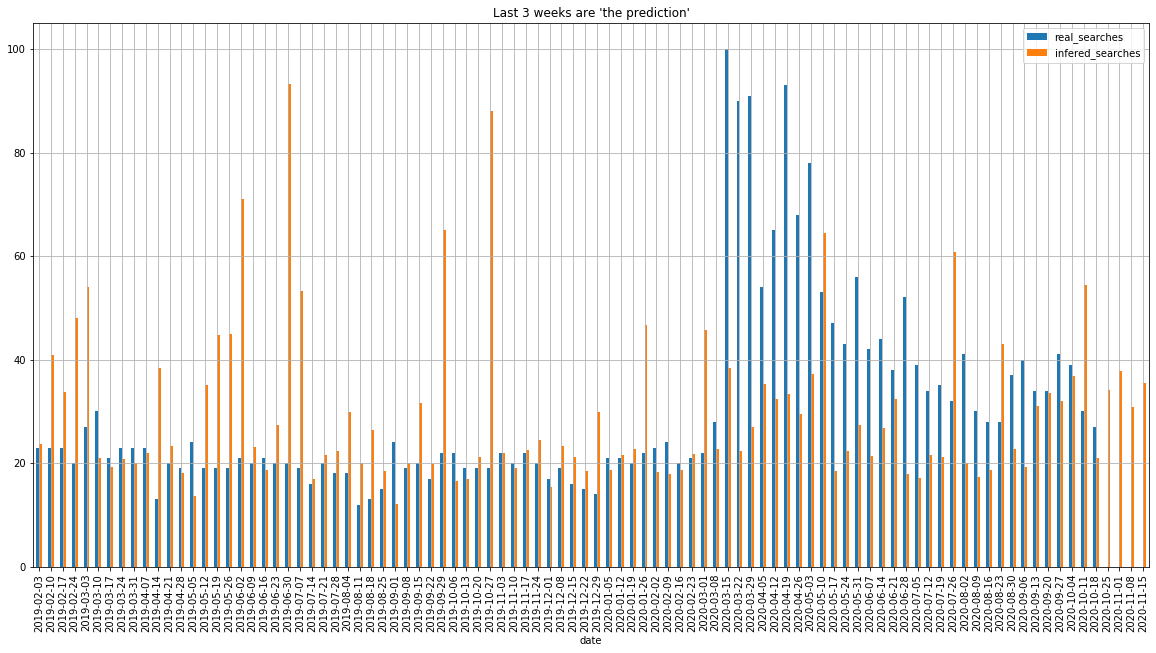

In [15]:
result.plot(x="date",
            y=["real_searches","infered_searches"],
            figsize=(20,10), 
            kind="bar",
            title="Last 3 weeks are 'the prediction'",
            grid=True)

## CSV to append weekly the score

In [16]:
score = pd.DataFrame({"date": [max(df["date"])], 'score': [round(rfecv.score(X, target),4)]})
score.to_csv("input/weekly_score.csv")
score

,date,score
0,2020-11-15,0.6798


## CSV to overwrite weekly ranking of features by importance

In [17]:
features=pd.DataFrame()
features["features"]=X.columns
features["top_important"]=rfecv.ranking_
features.sort_values(by=["top_important"], inplace=True)
features.reset_index(drop=True, inplace=True)
features.to_csv("input/ranking_of_features.csv")
features.head(25)
# Ranking of how important are the following keywords to infer in Google searches in Spain
# the keyword "unemployment"

,features,top_important
0,yoga,1
1,banco_mundial,1
2,quiebra_economica,1
3,racismo,1
4,pandemia,1
5,podemos,1
6,banco alimentos,1
7,sepe,1
8,teletrabajo,1
9,formacion,1
